Mounting Colab on Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing necessary Libraries

In [4]:
import io
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import random
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

Reading data from cvs file into a list

In [5]:
data= []
with open("/content/drive/MyDrive/English_Dataset.csv", 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        data.append(row)
random.seed(0)
random.shuffle(data)
print(data[0])       

["One of the main ways that Facebook addicts users is games, and now Google+ is following Facebook into gaming.\n\nGoogle began introducing games on its social network Thursday, and while it is starting with just a few options, they include big-name games like Angry Birds from Rovio, Bejeweled Blitz from PopCap Games and, most notably, Zynga Poker.\n\nZynga has built the vast majority of its business on Facebook, and that business is thriving - Zynga has filed to go public and says it earned $90 million in profit on sales of $597 million last year. But analysts have also criticized it for relying too much on one platform.\n\nThat is about to change. Google+ has been growing remarkably quickly, and already it rivals existing social networks. Though it does not have Zynga's most well-known games, FarmVille and Mafia Wars, the two companies already have a partnership because Google has invested in Zynga.\n\nGoogle+ users will see a Games page at the top of their news feeds and can click o

Parsing data from the list and convert upper case letters to lower case

In [6]:
sentences = []
labels = []
for i in range(len(data)):
  s = data[i][0]
  sentence = " ".join(s.split())
  sentence = sentence.lower()
  sentences.append(sentence)
  labels.append(data[i][1])
print(sentences[0])
print("\n\n the label of this sentence is: ", labels[0])

one of the main ways that facebook addicts users is games, and now google+ is following facebook into gaming. google began introducing games on its social network thursday, and while it is starting with just a few options, they include big-name games like angry birds from rovio, bejeweled blitz from popcap games and, most notably, zynga poker. zynga has built the vast majority of its business on facebook, and that business is thriving - zynga has filed to go public and says it earned $90 million in profit on sales of $597 million last year. but analysts have also criticized it for relying too much on one platform. that is about to change. google+ has been growing remarkably quickly, and already it rivals existing social networks. though it does not have zynga's most well-known games, farmville and mafia wars, the two companies already have a partnership because google has invested in zynga. google+ users will see a games page at the top of their news feeds and can click on it to play g

**Separating train/test data**

In [7]:
split_size = 0.8
train_size = int(split_size*len(sentences))

# Split the sentences and labels into train/validation splits
train_sentences = sentences[0:train_size]
train_labels = labels[0:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

**Defining global parameters**

In [8]:
#The maximum number of words to keep
NUM_WORDS = 1000
#Dimension of the dense embedding
EMBEDDING_DIM = 16
#Maximum length of all sequences
MAXLEN = 120
#Padding strategy
PADDING = 'post'
#Token to replace non vocab words
NON_VOCAB = "<>"

**Tokenizing data**

In [9]:
tokenizer = Tokenizer(num_words = NUM_WORDS, oov_token = NON_VOCAB)
tokenizer.fit_on_texts(train_sentences)


**Creating Padded Sequences**

In [10]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded_sequences = pad_sequences(train_sequences, maxlen = MAXLEN, padding = PADDING)

validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded_sequences = pad_sequences(validation_sequences, maxlen = MAXLEN, padding = PADDING)

**Converting labels to numpy array**

In [11]:
t_labels = [float(i) for i in train_labels]
t_labels = np.array(t_labels)
t_labels = np.reshape(t_labels, (len(train_labels), 1))
print(t_labels)
print(t_labels.shape)

v_labels = [float(i) for i in validation_labels]
v_labels = np.array(v_labels)
v_labels = np.reshape(v_labels, (len(validation_labels), 1))

[[1.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]
(1739, 1)


**Create a Model**

In [12]:
model = tf.keras.Sequential([ 
        tf.keras.layers.Embedding(NUM_WORDS, EMBEDDING_DIM, input_length = MAXLEN),
        tf.keras.layers.GlobalAveragePooling1D(),
        #tf.keras.layers.Dense(4, activation = "relu"),
        #tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
    ])

**Compiling the Model**

In [13]:
model.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])

**Training the Model**

In [14]:
history = model.fit(train_padded_sequences, t_labels, epochs=30, validation_data=(validation_padded_sequences, v_labels))

Epoch 1/30
55/55 [==============================] - 1s 7ms/step - loss: 0.6740 - accuracy: 0.6699 - val_loss: 0.6567 - val_accuracy: 0.6736
Epoch 2/30
55/55 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6705 - val_loss: 0.6355 - val_accuracy: 0.6736
Epoch 3/30
55/55 [==============================] - 0s 3ms/step - loss: 0.6297 - accuracy: 0.6705 - val_loss: 0.6244 - val_accuracy: 0.6736
Epoch 4/30
55/55 [==============================] - 0s 3ms/step - loss: 0.6200 - accuracy: 0.6705 - val_loss: 0.6163 - val_accuracy: 0.6736
Epoch 5/30
55/55 [==============================] - 0s 4ms/step - loss: 0.6115 - accuracy: 0.6705 - val_loss: 0.6084 - val_accuracy: 0.6736
Epoch 6/30
55/55 [==============================] - 0s 3ms/step - loss: 0.6023 - accuracy: 0.6705 - val_loss: 0.5998 - val_accuracy: 0.6736
Epoch 7/30
55/55 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.6705 - val_loss: 0.5902 - val_accuracy: 0.6736
Epoch 8/30
55/55 [==

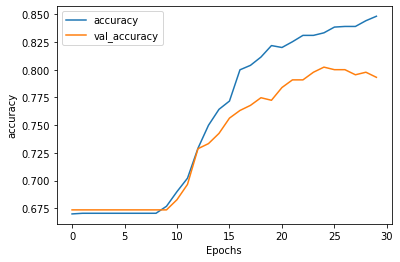

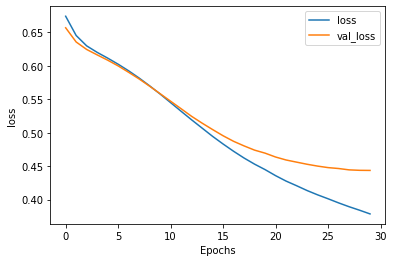

In [15]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

**Creating SVM classifier**

**Predicting the Test set results**

In [16]:
y_pred = model.predict(validation_padded_sequences)

In [21]:
predicted = []
for i in y_pred:
  if i>=0.5:
    predicted.append(1)
  else:
    predicted.append(0)

**Making the Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(v_labels, predicted)

In [24]:
print(cm)

[[ 78  64]
 [ 26 267]]


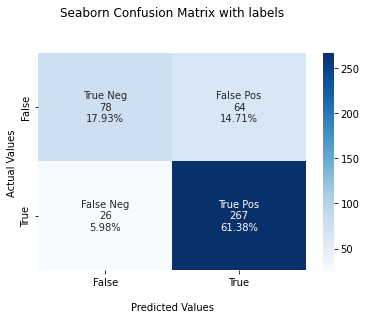

In [27]:
import seaborn as sns
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()